In [1]:
from functions3 import *
from multiprocessing import Pool
import glob
import numpy as np
import datetime
import matplotlib.pyplot as plt
from collections import Counter
from ast import literal_eval
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import scipy

In [2]:
len(glob.glob("Processed_Data/Temp/urls1/*"))

10450

In [3]:
df = pd.read_pickle("Processed_Data/all_tweets.pkl")

In [4]:
df = pd.read_pickle("Processed_Data/all_tweets.pkl")
df = df[["userid", "date", "text", "hashtag", "country", "state"]]
df["text_processing"] = df.text.apply(lambda x: x.lower() )
df = df[df.text.apply(lambda x: "bts" in x)]

In [6]:
# df2 = df[ df.text.apply(lambda x: "RT @DrTedros" in x) ]
# df2 = df2[df2.text.apply(lambda x: "bts" in x.lower())]

In [5]:
df = pd.read_pickle("Processed_Data/mask_tweets.pkl")
NM = pd.read_pickle("Processed_Data/no_mask_tweets.pkl")

In [6]:
ST = df[~df.state.isna()].state.value_counts().reset_index()
ST.columns=["State", "num"]
ST["kpop_prop"] = ST.num / ST.num.sum()

In [7]:
if __name__ == "__main__":
    pool = Pool(24)
    ST_ALL = pool.map(multicore_read_and_sort, glob.glob("Processed_Data/0_State_Count/*.pkl"))
    pool.close()
    pool.join()
    ST_ALL = np.hstack(ST_ALL)
    ST_ALL = ST_ALL.sum(axis=1)

In [8]:
ST_ALL = pd.DataFrame(ST_ALL, columns=["num"])
ST_ALL["State"] = state_cols
ST_ALL = ST_ALL[["State", "num"]]
ST_ALL["prop"] = ST_ALL.num / ST_ALL.num.sum()
ST_ALL.sort_values("prop", ascending=False, inplace= True)

In [9]:
A = pd.read_csv("Processed_Data/Demographics/Asian.csv")
B = pd.read_csv("Processed_Data/Demographics/Black.csv")
W = pd.read_csv("Processed_Data/Demographics/White.csv")
USA = pd.read_csv("Processed_Data/Demographics/USA_All.csv")
H = pd.read_csv("Processed_Data/Demographics/Hispanic.csv")
ABV= pd.read_csv("Processed_Data/Demographics/Abbr.csv")

state2Code = dict(zip(ABV.State.values, ABV.Code.values))
USA.State = USA.State.apply(lambda x: state2Code.get(x,np.nan))
B.State = B.State.apply(lambda x: state2Code.get(x,np.nan))
W.State = W.State.apply(lambda x: state2Code.get(x,np.nan))
H.State = H.State.apply(lambda x: state2Code.get(x,np.nan))
A.State = A.State.apply(lambda x: state2Code.get(x,np.nan))

In [10]:
ST = ST.merge(ST_ALL[["State","prop" ]] )

In [11]:
ST2 = ST.copy()
ST2.kpop_prop = np.log10(ST2.kpop_prop)
ST2.prop = np.log10(ST2.prop)

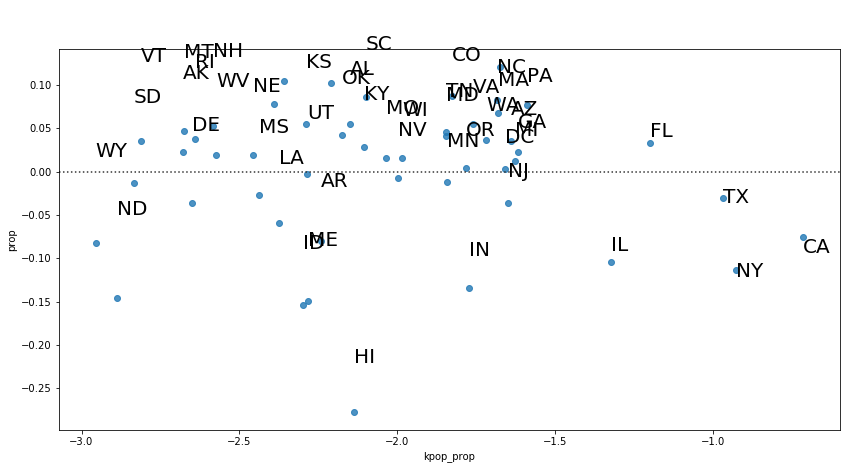

In [280]:
plt.figure(figsize=(14,7))
sns.residplot((ST2.kpop_prop), (ST2.prop), label = "USA")
for i,r in ST2.iterrows():
#     plt.annotate(r.State, (np.log(r.kpop_prop, np.log(r.prop))))
    plt.annotate(r.State,(r.kpop_prop,r.prop -r.kpop_prop), fontsize=20)


# # sns.residplot(ST.kpop_prop, ST.Asian_Black, label="Black + Asian")
# sns.residplot(ST.kpop_prop, ST.Asian, label = "Asian")
# sns.residplot(ST.kpop_prop, ST.Black, label="Black")
# sns.residplot(ST.kpop_prop, ST.White, label = "White")
# sns.residplot(ST.kpop_prop, ST.Hispanic, label="Hispanic")
# plt.legend()

In [12]:
ST["perc_dif"] = ST.kpop_prop - ST.prop

## Compare demographic reach differences based on race

In [13]:
USA = USA[["Percent", "State"]]
USA.columns = ["USA_percent", "State"]
ST = ST.merge(USA)
ST["state_dif"] = ST.kpop_prop - ST.USA_percent

In [14]:
ST["twt_leverage"] = ST["perc_dif"] / ST["prop"]
ST["state_leverage"] = ST["state_dif"] / ST["USA_percent"]

In [16]:
ST["S_T_Dif"] = ST["twt_leverage"] - ST["state_leverage"]

In [17]:
ST.sort_values("state_leverage", ascending=False)

,State,num,kpop_prop,prop,perc_dif,USA_percent,state_dif,twt_leverage,state_leverage,S_T_Dif
16,DC,9717,0.019378,0.023676,-0.004298,0.0021,0.017278,-0.181550,8.227526,-8.409076
1,NY,58478,0.116618,0.089777,0.026841,0.0577,0.058918,0.298968,1.021106,-0.722138
29,ME,3638,0.007255,0.004285,0.002970,0.0040,0.003255,0.693060,0.813740,-0.120680
7,MA,15085,0.030083,0.026284,0.003799,0.0207,0.009383,0.144530,0.453273,-0.308743
17,OR,9028,0.018004,0.018158,-0.000154,0.0128,0.005204,-0.008504,0.406546,-0.415050
0,CA,82638,0.164798,0.155721,0.009077,0.1184,0.046398,0.058288,0.391876,-0.333588
14,CO,9931,0.019805,0.019952,-0.000148,0.0176,0.002205,-0.007398,0.125259,-0.132657
46,VT,1066,0.002126,0.002063,0.000063,0.0019,0.000226,0.030466,0.118861,-0.088394
5,GA,17785,0.035467,0.027128,0.008339,0.0324,0.003067,0.307410,0.094665,0.212745
25,NV,4951,0.009873,0.011035,-0.001162,0.0095,0.000373,-0.105283,0.039302,-0.144585


In [18]:
ST.sort_values("S_T_Dif", ascending=False)

,State,num,kpop_prop,prop,perc_dif,USA_percent,state_dif,twt_leverage,state_leverage,S_T_Dif
43,SD,1315,0.002622,0.001759,0.000863,0.0027,-0.000078,0.490604,-0.028743,0.519346
50,ND,476,0.000949,0.001154,-0.000204,0.0023,-0.001351,-0.177094,-0.587284,0.410190
42,MS,1450,0.002892,0.004032,-0.001141,0.0089,-0.006008,-0.282911,-0.675100,0.392188
24,MO,4979,0.009929,0.010704,-0.000775,0.0184,-0.008471,-0.072399,-0.460369,0.387971
34,UT,2833,0.005650,0.005980,-0.000330,0.0099,-0.004250,-0.055255,-0.429332,0.374076
44,LA,1162,0.002317,0.004315,-0.001998,0.0138,-0.011483,-0.462996,-0.832081,0.369085
20,WI,6974,0.013908,0.012029,0.001878,0.0175,-0.003592,0.156158,-0.205276,0.361434
35,NE,2791,0.005566,0.004320,0.001246,0.0058,-0.000234,0.288354,-0.040369,0.328723
41,WV,1453,0.002898,0.003340,-0.000442,0.0053,-0.002402,-0.132333,-0.453284,0.320951
31,IA,3309,0.006599,0.006511,0.000088,0.0095,-0.002901,0.013560,-0.305383,0.318943


In [207]:
DEM = A[["State", "AsianTotal"]].merge(B[["State", "BlackTotal"]])
DEM = DEM.merge(W[["State", "WhiteTotal"]]).merge(H[["State", "HispanicTotal"]])

In [239]:
mult_cols = ["AsianTotal", "BlackTotal", "WhiteTotal", "HispanicTotal"]
DEM_TWT_ADJ = DEM.merge(ST[["State", "perc_dif"]])
DEM_TWT_ADJ["perc_dif"] = DEM_TWT_ADJ["perc_dif"] + 1
DEM_TWT_ADJ = DEM_TWT_ADJ[mult_cols].multiply(DEM_TWT_ADJ.perc_dif.values, axis=0)

In [238]:
DEM_USA_ADJ = DEM.merge(ST[["State", "state_dif"]])
DEM_USA_ADJ["state_dif"] = DEM_USA_ADJ["state_dif"] + 1
DEM_USA_ADJ = DEM_USA_ADJ[mult_cols].multiply(DEM_USA_ADJ.state_dif.values, axis=0)

## Advantage Summary

In [252]:
ADV1 = DEM[mult_cols].sum().reset_index()
ADV1.columns = ["Race", "PopulationTotal"]

ADV2 = DEM_TWT_ADJ[mult_cols].sum().reset_index()
ADV2.columns = ["Race", "TweetTotal"]

ADV3 = DEM_USA_ADJ[mult_cols].sum().reset_index()
ADV3.columns = ["Race", "KPopTotal"]

In [259]:
ADV = ADV1.merge(ADV2).merge(ADV3)
ADV["PopulationTotal"] = ADV["PopulationTotal"] / ADV["PopulationTotal"].sum()
ADV["TweetTotal"] = ADV["TweetTotal"] / ADV["TweetTotal"].sum()
ADV["KPopTotal"] = ADV["KPopTotal"] / ADV["KPopTotal"].sum()

ADV["TweetAdvantage"] = ADV.apply(lambda r: ( (r.KPopTotal - r.TweetTotal)/r.TweetTotal ) , axis = 1  )
ADV["PopAdvantage"] = ADV.apply(lambda r:   ( (r.KPopTotal - r.PopulationTotal)/r.PopulationTotal ) , axis = 1  )

In [261]:
ADV

,Race,PopulationTotal,TweetTotal,KPopTotal,TweetAdvantage,PopAdvantage
0,AsianTotal,0.057862,0.058043,0.058479,0.007513,0.010654
1,BlackTotal,0.122595,0.122637,0.122227,-0.003342,-0.002996
2,WhiteTotal,0.661419,0.661247,0.660117,-0.001710,-0.001969
3,HispanicTotal,0.158124,0.158073,0.159177,0.006988,0.006661


## Load Covariates

In [129]:
A = pd.read_csv("Processed_Data/Demographics/Asian.csv")
B = pd.read_csv("Processed_Data/Demographics/Black.csv")
W = pd.read_csv("Processed_Data/Demographics/White.csv")
USA = pd.read_csv("Processed_Data/Demographics/USA_All.csv")
H = pd.read_csv("Processed_Data/Demographics/Hispanic.csv")
ABV= pd.read_csv("Processed_Data/Demographics/Abbr.csv")

state2Code = dict(zip(ABV.State.values, ABV.Code.values))
USA.State = USA.State.apply(lambda x: state2Code.get(x,np.nan))
B.State = B.State.apply(lambda x: state2Code.get(x,np.nan))
W.State = W.State.apply(lambda x: state2Code.get(x,np.nan))
H.State = H.State.apply(lambda x: state2Code.get(x,np.nan))
A.State = A.State.apply(lambda x: state2Code.get(x,np.nan))

In [130]:
A["Asian"] = A.AsianTotal/A.AsianTotal.sum()
B["Black"] = B.BlackTotal/B.BlackTotal.sum()
W["White"] = W.WhiteTotal/W.WhiteTotal.sum()
H["Hispanic"] = H.HispanicTotal/H.HispanicTotal.sum()

In [131]:
BA = B.merge(A)
BA["BA_Total"] = BA.BlackTotal + BA.AsianTotal
BA["BAPerc"] = BA.BA_Total / BA.BA_Total.sum()

## Residual Plots

In [132]:
cols = ["State", "kpop_num", "kpop_prop", "USA", "Asian_Black", "Asian", "Black", "White", "Hispanic"]
ST = ST.merge(USA[["State","Percent"]])
ST = ST.merge(BA[["State","BAPerc"]])
ST = ST.merge(BA[["State","BAPerc"]])
ST = ST.merge(A[["State", "Asian"]])
ST = ST.merge(B[["State", "Black"]])
ST = ST.merge(W[["State", "White"]])
ST = ST.merge(H[["State", "Hispanic"]])
ST.columns = cols

In [20]:
ST.kpop_prop = np.log10(ST.kpop_prop)
ST.Asian_Black = np.log10(ST.Asian_Black)
ST.USA = np.log10(ST.USA)
ST[["Asian", "Black", "White", "Hispanic"]] = np.log10(ST[["Asian", "Black", "White", "Hispanic"]])

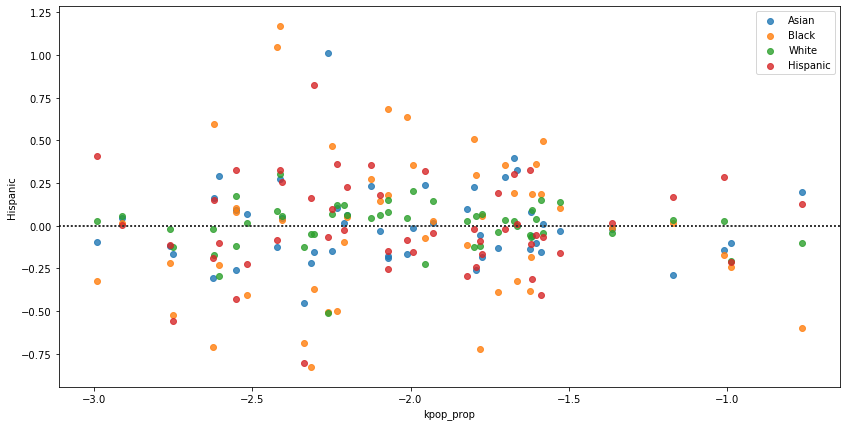

In [23]:
plt.figure(figsize=(14,7))
# sns.residplot(ST.kpop_prop, ST.USA, label = "USA")
# sns.residplot(ST.kpop_prop, ST.Asian_Black, label="Black + Asian")
sns.residplot(ST.kpop_prop, ST.Asian, label = "Asian")
sns.residplot(ST.kpop_prop, ST.Black, label="Black")
sns.residplot(ST.kpop_prop, ST.White, label = "White")
sns.residplot(ST.kpop_prop, ST.Hispanic, label="Hispanic")
plt.legend()

In [81]:
slope, intercept, r_USA, p_value, std_err = scipy.stats.linregress(ST.kpop_prop, ST.USA)
slope, intercept, r_AB, p_value, std_err = scipy.stats.linregress(ST.kpop_prop, ST.Asian_Black)
slope, intercept, r_A, p_value, std_err = scipy.stats.linregress(ST.kpop_prop, ST.Asian)
slope, intercept, r_B, p_value, std_err = scipy.stats.linregress(ST.kpop_prop, ST.Black)
slope, intercept, r_W, p_value, std_err = scipy.stats.linregress(ST.kpop_prop, ST.White)
slope, intercept, r_H, p_value, std_err = scipy.stats.linregress(ST.kpop_prop, ST.Hispanic)

In [82]:
r_USA, r_AB, r_A, r_B, r_W, r_H

(0.9365997744625448,
 0.8272579045653028,
 0.9028081141084819,
 0.7728589852517133,
 0.9295074186568529,
 0.8840102893046425)

### USA Prop Regression

In [28]:
USA.State = USA.State.apply(lambda x: state2Code.get(x, np.nan))
USA = USA[~USA.State.isna()]

In [53]:
DF1 = ST.merge(USA[["rank", "Percent","State"]],left_on = "state", right_on  = "State")

Text(0, 0.5, 'Actual State Population Percentage')

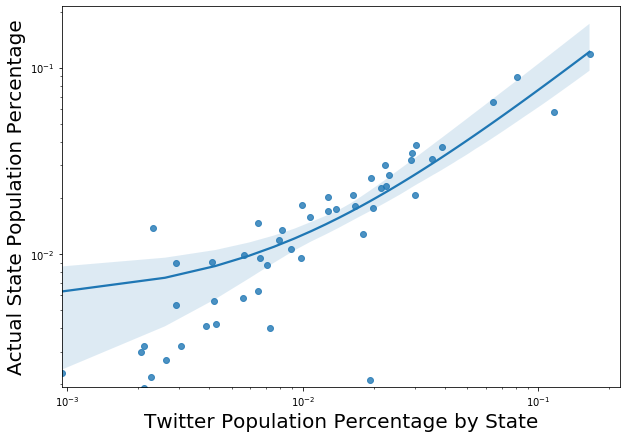

In [50]:
plt.figure(figsize=(10,7))
sns.regplot(x="kpop_prop", y="Percent", data=DF1)
plt.anno
plt.yscale("log")
plt.xscale("log")
plt.xlabel("Twitter Population Percentage by State", fontsize=20)
plt.ylabel("Actual State Population Percentage", fontsize=20)

In [95]:
DF1["mask_rank"] = DF1.index # Mask Twitter Rank

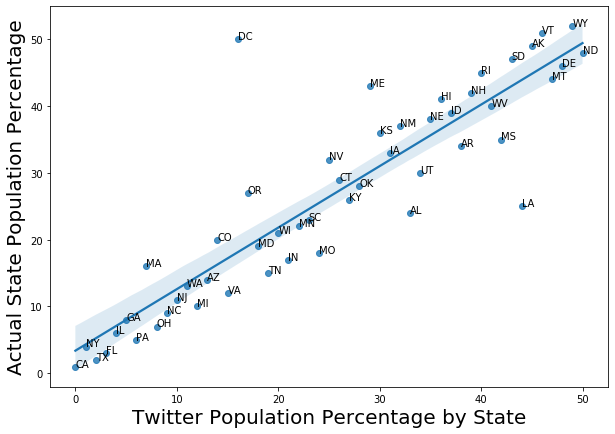

In [60]:
plt.figure(figsize=(10,7))
sns.regplot(x="pop_rank", y="rank", data=DF1)
plt.xlabel("Twitter Population Percentage by State", fontsize=20)
plt.ylabel("Actual State Population Percentage", fontsize=20)
for i,r in DF1.iterrows():
    plt.annotate(r.state, (r.pop_rank,r["rank"]))

In [ ]:
## Prop Regression

In [67]:
A.State = A.State.apply(lambda x: state2Code.get(x,np.nan))
B.State = B.State.apply(lambda x: state2Code.get(x,np.nan))
H.State = H.State.apply(lambda x: state2Code.get(x,np.nan))
W.State = W.State.apply(lambda x: state2Code.get(x,np.nan))

In [ ]:
## Ranking Regression

In [84]:
A = A.sort_values(by="AsianTotal",ascending=False).reset_index(drop=True)
W = W.sort_values(by="WhiteTotal",ascending=False).reset_index(drop=True)
H = H.sort_values(by="HispanicTotal",ascending=False).reset_index(drop=True)
B = B.sort_values(by="BlackTotal",ascending=False).reset_index(drop=True)

In [85]:
A["A_Rank"] = A.index
B["B_Rank"] = B.index
H["H_Rank"] = H.index
W["W_Rank"] = W.index

In [92]:
DF2 = ST.merge(A[["A_Rank","State"]],left_on = "state", right_on  = "State")
DF2 = DF2.merge(B[["B_Rank","State"]],left_on = "state", right_on  = "State")
DF2 = DF2.merge(W[["W_Rank","State"]],left_on = "state", right_on  = "State")
DF2 = DF2.merge(H[["H_Rank","State"]],left_on = "state", right_on  = "State")

In [97]:
DF2["mask_rank"] = DF2.index

Text(0, 0.5, 'Actual State Population Rank')

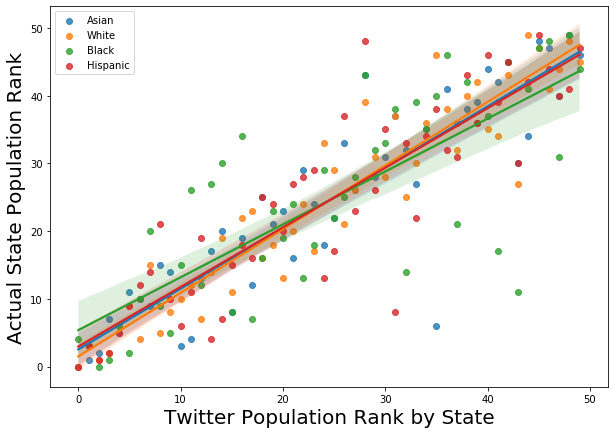

In [99]:
plt.figure(figsize=(10,7))
sns.regplot(x="mask_rank", y="A_Rank", data=DF2, label="Asian")
sns.regplot(x="mask_rank", y="W_Rank", data=DF2, label="White")
sns.regplot(x="mask_rank", y="B_Rank", data=DF2, label="Black")
sns.regplot(x="mask_rank", y="H_Rank", data=DF2, label="Hispanic")

# for i,r in DF2.iterrows():
#     plt.annotate(r.state, (r.mask_rank,r["rank"]))
plt.legend()
    
plt.xlabel("Twitter Population Rank by State", fontsize=20)
plt.ylabel("Actual State Population Rank", fontsize=20)